An analysis of the Heart database

In [1]:
#Import libraries

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#read the df

heart_df = pd.read_csv('heart (1).csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


COLUMNS IN FULL:

age: Age

sex: Sex

cp: Chest Pain

trestbps: Resting Blood Pressure

chol: Cholesterol

fbs: Fasting Blood Sugar

restecg: Resting Electrocardiographic1

thalach: Thalassemia Maximum Heart Rate Achieved

exang: Exercise Induced Angina

oldpeak: Old Peak (ST depression induced by exercise relative to rest)

slope: Slope (the slope of the peak exercise ST segment)

ca: Number of Major Vessels

thal: Thalassemia

target: Target (Indicates presence of heart disease)

In [3]:
#check for null values

heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


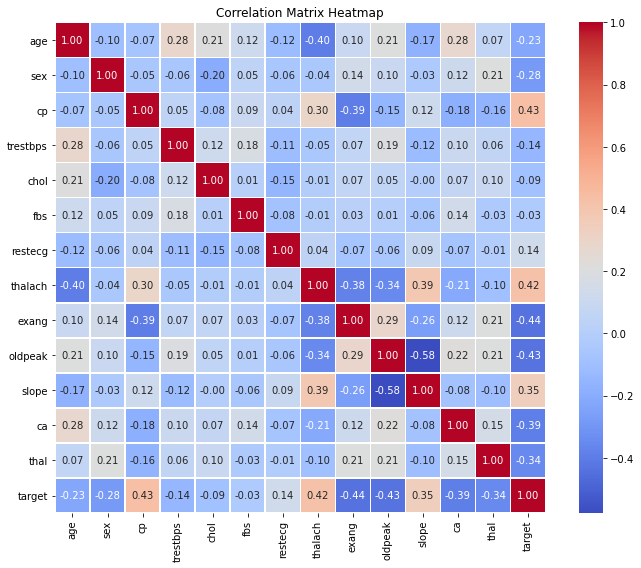

In [5]:
corr_matrix = heart_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [6]:
#Finding the correlation(-1---0---+1)
heart_df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [7]:
#drop the categorical columns
heart_df1 = heart_df.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis =1)
heart_df1.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [8]:
heart_df1.corr()['target']

age        -0.225439
trestbps   -0.144931
chol       -0.085239
thalach     0.421741
oldpeak    -0.430696
target      1.000000
Name: target, dtype: float64

In [9]:
x = heart_df1['age']
y = heart_df1['target']

In [10]:
x = sm.add_constant(x)

In [11]:
#fit the model

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     16.12
Date:                Sat, 17 May 2025   Prob (F-statistic):           7.52e-05
Time:                        12:51:03   Log-Likelihood:                -210.80
No. Observations:                 303   AIC:                             425.6
Df Residuals:                     301   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2177      0.170      7.163      0.0

##### Findings

const (Intercept): 1.2177: This is the estimated value of the 'target' variable when 'age' is zero.

age: -0.0124: This is the estimated coefficient for the 'age' variable. It suggests that for every one-year increase in age, the 'target' variable (the predicted probability of heart disease) decreases by approximately 0.0124.

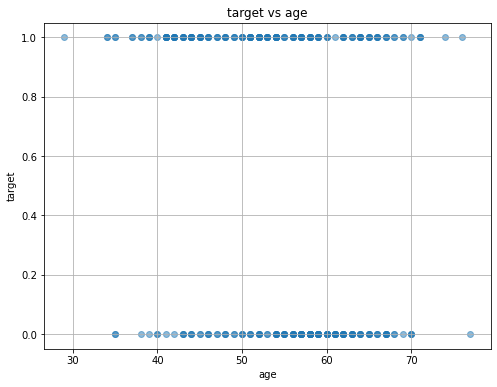

In [12]:
#plot a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(heart_df1['age'], heart_df1['target'], alpha=0.5)
plt.xlabel("age")
plt.ylabel("target")
plt.title("target vs age")
plt.grid(True)
plt.show()

[]

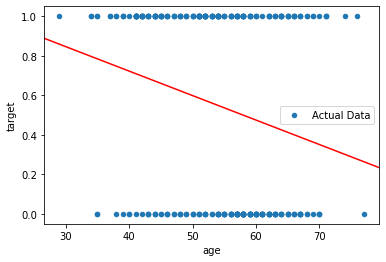

In [13]:
fig, ax =  plt.subplots()
heart_df1.plot.scatter(x="age", y ="target", ax=ax, label="Actual Data")
sm.graphics.abline_plot (model_results=results, ax=ax, color="red", label="predicted_value")
plt.plot()

##### Findings

R-squared of 0.051 is the coefficient of determination. It tells you the proportion of the variance in the 'target' variable that can be explained by the 'age' variable. In this case, only about 5.1% of the variation in heart disease presence (target) can be explained by age. This suggests that age alone is not a very strong predictor of the target variable.

#### Using multiple linear regression

In [14]:
x1 = heart_df1[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y1 = heart_df1['target']

In [15]:
x1 = sm.add_constant(x1)

In [16]:
#fit the model

model1 = sm.OLS(y1,x1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     22.92
Date:                Sat, 17 May 2025   Prob (F-statistic):           1.86e-19
Time:                        12:51:03   Log-Likelihood:                -169.26
No. Observations:                 303   AIC:                             350.5
Df Residuals:                     297   BIC:                             372.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0642      0.319      0.201      0.8

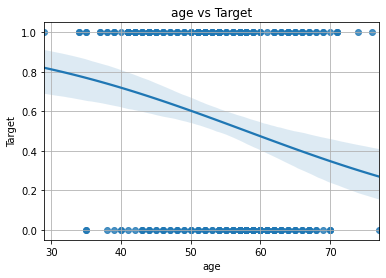

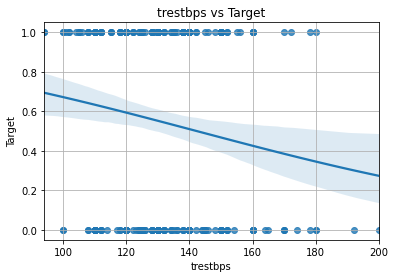

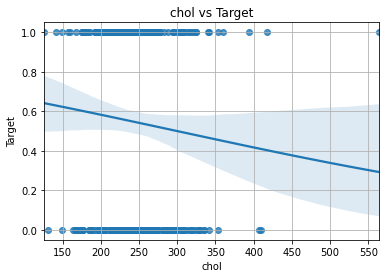

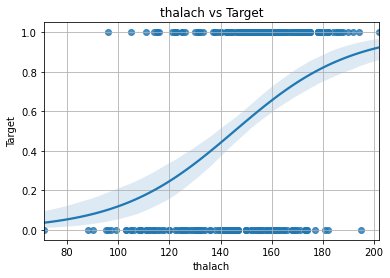

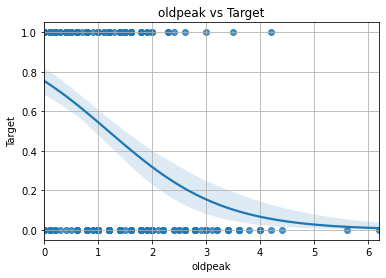

In [17]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=heart_df1[feature], y=heart_df1[target], logistic=True if heart_df1[target].nunique() == 2 else False)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()

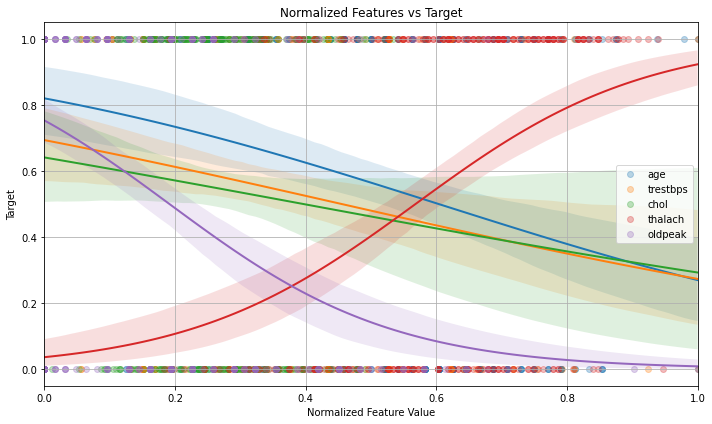

In [18]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(heart_df1[features])
norm_df = pd.DataFrame(normalized_features, columns=features)
norm_df[target] = heart_df1[target].values

# Plot all normalized features vs. target
plt.figure(figsize=(10, 6))

for feature in features:
    sns.regplot(
        x=norm_df[feature],
        y=norm_df[target],
        logistic=True,     
        label=feature,
        scatter_kws={'alpha': 0.3},  # transparency for scatter points
        line_kws={'linewidth': 2}    # thicker regression line
    )

plt.title('Normalized Features vs Target')
plt.xlabel('Normalized Feature Value')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
residuals = results1.resid
print(residuals)

0      0.639951
1      0.520290
2      0.320736
3      0.207701
4      0.346488
         ...   
298   -0.463041
299   -0.437318
300   -0.175181
301   -0.354084
302   -0.853049
Length: 303, dtype: float64


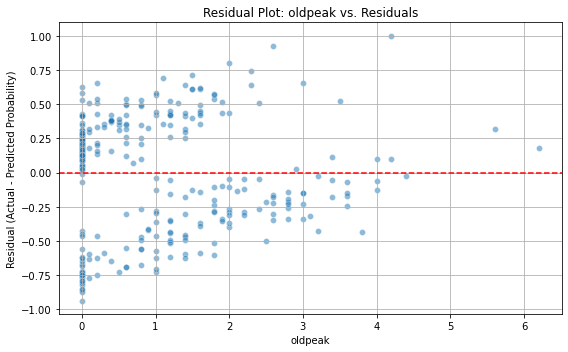

In [20]:
# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=heart_df1[feature], y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Residual Plot: {feature} vs. Residuals')
plt.xlabel(feature)
plt.ylabel('Residual (Actual - Predicted Probability)')
plt.grid(True)
plt.tight_layout()
plt.show()

Categorical Features

In [21]:
# Define target and predictor

x2 = heart_df.drop(columns=["target"])
y2 = heart_df["target"]

In [22]:
# Initialize the model

model = LinearRegression()

In [23]:
model.fit(x2, y2)

LinearRegression()

#### Use get_dummies to handle categorical features. Which is the sex column.

In [24]:
# Use get_dummies

heart_dummies = pd.get_dummies(heart_df, columns=['sex'], drop_first=True)

# Inspect

heart_dummies.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_1
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [25]:
# Define X and y

x_dummies = heart_dummies.drop(columns = ['target'])
y_dummies = heart_dummies['target']

# define our constant

x_constant_dummies = sm.add_constant(x_dummies)

# Initialize

model_ols = sm.OLS(y_dummies, x_constant_dummies)

# Fit and get results

results = model_ols.fit()

# Print summary

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Sat, 17 May 2025   Prob (F-statistic):           1.49e-38
Time:                        12:51:33   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8289      0.293      2.830      0.0

Categorical variables: sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'

In [26]:
# Use get_dummies

heart_dummies1 = pd.get_dummies(heart_df, columns=['cp'], drop_first=True)

# Inspect

heart_dummies1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0


In [27]:
# Define X and y

x_dummies1 = heart_dummies1.drop(columns = ['target'])
y_dummies1 = heart_dummies1['target']

# define our constant

x_constant_dummies1 = sm.add_constant(x_dummies1)

# Initialize

model_ols1 = sm.OLS(y_dummies1, x_constant_dummies1)

# Fit and get results

results1 = model_ols1.fit()

# Print summary

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     20.97
Date:                Sat, 17 May 2025   Prob (F-statistic):           7.61e-38
Time:                        12:51:33   Log-Likelihood:                -106.58
No. Observations:                 303   AIC:                             245.2
Df Residuals:                     287   BIC:                             304.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7871      0.294      2.676      0.0

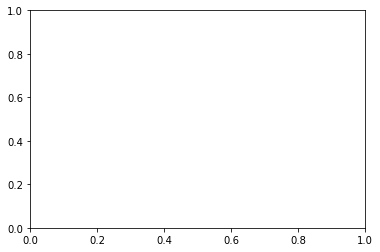

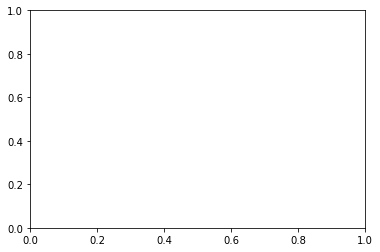

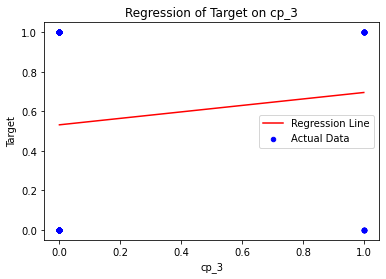

In [28]:
#plotting for 'cp' categorical dummy variables 
#List of dummy variables
feature2 = ['cp_1', 'cp_2', 'cp_3']

#Loop through each feature and plot
for feature in feature2:
    fig, ax = plt.subplots()
    

# Scatter plot for the current feature against the target
if feature in heart_dummies1.columns:
    heart_dummies1.plot.scatter(x=feature, y='target', ax=ax, label='Actual Data', color='blue')
    
    # Prepare data for regression model
    X = heart_dummies1[[feature]]
    y = heart_dummies1['target']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Predicted values
    predictions = model.predict(X)
    
    # Plot the regression line
    ax.plot(heart_dummies1[feature], predictions, color='red', label='Regression Line')
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'Regression of Target on {feature}')
    ax.legend()
    plt.show()